In [14]:
import sweetviz as sz
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly_express as px

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

In [15]:
df = pd.read_csv('dataset/heart.csv')

About dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack



In [16]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA # principal component analysis

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
x = df[df.columns.to_list()[:-1]]
y = df.output

In [21]:
test1 = SelectKBest(score_func=chi2,k=3)
test1.fit_transform(x,y)

array([[1.50e+02, 2.30e+00, 0.00e+00],
       [1.87e+02, 3.50e+00, 0.00e+00],
       [1.72e+02, 1.40e+00, 0.00e+00],
       [1.78e+02, 8.00e-01, 0.00e+00],
       [1.63e+02, 6.00e-01, 0.00e+00],
       [1.48e+02, 4.00e-01, 0.00e+00],
       [1.53e+02, 1.30e+00, 0.00e+00],
       [1.73e+02, 0.00e+00, 0.00e+00],
       [1.62e+02, 5.00e-01, 0.00e+00],
       [1.74e+02, 1.60e+00, 0.00e+00],
       [1.60e+02, 1.20e+00, 0.00e+00],
       [1.39e+02, 2.00e-01, 0.00e+00],
       [1.71e+02, 6.00e-01, 0.00e+00],
       [1.44e+02, 1.80e+00, 0.00e+00],
       [1.62e+02, 1.00e+00, 0.00e+00],
       [1.58e+02, 1.60e+00, 0.00e+00],
       [1.72e+02, 0.00e+00, 0.00e+00],
       [1.14e+02, 2.60e+00, 0.00e+00],
       [1.71e+02, 1.50e+00, 0.00e+00],
       [1.51e+02, 1.80e+00, 2.00e+00],
       [1.61e+02, 5.00e-01, 0.00e+00],
       [1.79e+02, 4.00e-01, 0.00e+00],
       [1.78e+02, 0.00e+00, 0.00e+00],
       [1.37e+02, 1.00e+00, 0.00e+00],
       [1.78e+02, 1.40e+00, 0.00e+00],
       [1.62e+02, 4.00e-0

In [22]:
for col,val in zip(df.columns, test1.scores_):
    print(col.ljust(30),'|',val)

age                            | 23.286623985733986
sex                            | 7.576834507647363
cp                             | 62.59809791039943
trtbps                         | 14.823924500200537
chol                           | 23.936394475916686
fbs                            | 0.20293368467281492
restecg                        | 2.978270750988143
thalachh                       | 188.32047168970058
exng                           | 38.91437697129396
oldpeak                        | 72.6442530146183
slp                            | 9.804095197255574
caa                            | 66.4407651172357
thall                          | 5.7918529711930535


In [24]:
best_x = df[['thalachh','oldpeak','caa']]

In [25]:
fig = px.scatter_3d(df,x='thalachh',y='oldpeak',z='caa',color='output')
fig.write_html('select.html', auto_open = True)

In [58]:
kclf = KNeighborsClassifier(n_neighbors=4)

In [90]:
kclf.fit(best_x,y)
kclf.score(best_x,y) * 100

83.4983498349835

In [60]:
ypred = kclf.predict(best_x)

In [61]:
confusion_matrix(ypred,y)

array([[119,  31],
       [ 19, 134]])

In [81]:
print(classification_report(ypred,y))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       150
           1       0.81      0.88      0.84       153

    accuracy                           0.83       303
   macro avg       0.84      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303



In [82]:
xtrain, xtest, ytrain, ytest = train_test_split(best_x,y,test_size=.2)

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [84]:
m1 = LinearRegression()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest) * 100

19.95778165536842

In [85]:
m1 = DecisionTreeRegressor()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest) * 100

-69.44444444444444

In [86]:
m1 = RandomForestRegressor()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest) * 100

1.8696892716963176

In [87]:
m1 = KNeighborsRegressor()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest) * 100

-17.21568627450982

In [88]:
m1 = SVR()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest) * 100

-7.19404393275096

In [91]:
df['prediction'] = kclf.predict(best_x)

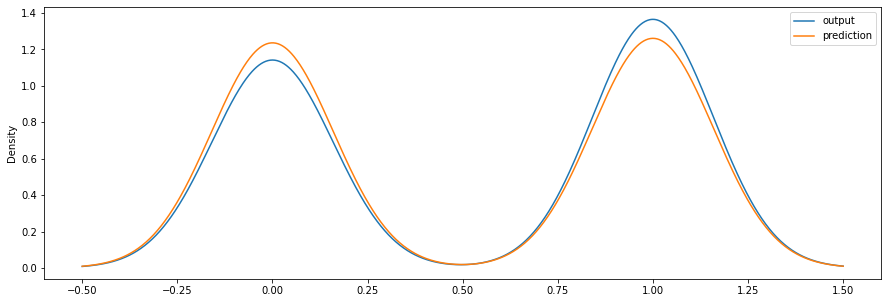

In [92]:
ax=df['output'].plot(kind='kde',figsize=(15,5))
df['prediction'].plot(kind='kde',figsize=(15,5), ax = ax)
plt.legend()
plt.show()